### Simulating From the Null Hypothesis

Load in the data below, and follow the questions to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by pushing the orange jupyter icon in the top left!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in if the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the first quiz question below.

$$ H_0: \mu_{\text{drinkers, height}} = \mu_{\text{non drinkers, height}} $$
$$ H_1: \mu_{\text{drinkers, height}} \neq \mu_{\text{non drinkers, height}} $$

A little bit of math to rearrange.

$$ H_0: \mu_{\text{drinkers, height}} - \mu_{\text{non drinkers, height}} = 0 $$
$$ H_1: \mu_{\text{drinkers, height}} - \mu_{\text{non drinkers, height}} \neq 0 $$

`2.` If you were interested in if the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

$$ H_0: \mu_{\text{drinkers, height}} \leq \mu_{\text{non drinkers, height}} $$
$$ H_1: \mu_{\text{drinkers, height}} > \mu_{\text{non drinkers, height}} $$

A little bit of math to rearrange.

$$ H_0: \mu_{\text{drinkers, height}} - \mu_{\text{non drinkers, height}} \leq 0 $$
$$ H_1: \mu_{\text{drinkers, height}} - \mu_{\text{non drinkers, height}} > 0$$

More math.

$$ H_0: \mu_{\text{non drinkers, height}} - \mu_{\text{drinkers, height}} \geq 0$$
$$ H_1: \mu_{\text{non drinkers, height}} - \mu_{\text{drinkers, height}} < 0$$

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [17]:
# Initializing variables
diff_mean = []
mean_drinkers = []
mean_non_drinkers = []

# Loop to generate 10,000 samples of 200 samples.
for index in range(10000):
    sample = sample_data.sample(200, replace = True)
    height_drinkers = sample[sample.drinks_coffee].height.mean()
    height_non_drinkers = sample[np.logical_not(sample.drinks_coffee)].height.mean()
    diff = height_drinkers - height_non_drinkers
    diff_mean.append(diff)
    mean_drinkers.append(height_drinkers)
    mean_non_drinkers.append(height_non_drinkers)

In [18]:
# Calculating the Standard Deviation of Non Coffee Drinkers.
np.std(mean_non_drinkers)

0.40401874709005919

In [31]:
# Calculating the Standard Deviation of Coffee Drinkers.
np.std(mean_drinkers)

0.24525350703064147

In [35]:
# Calculating the Standard Deviation of the Difference.
mean_std = np.std(diff_mean)

# Printing.
mean_std

0.46921860381680031

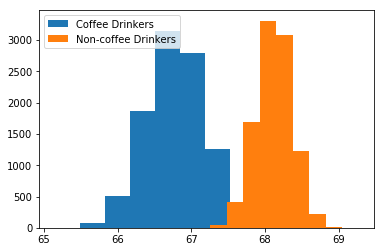

In [32]:
# Plotting Two histogram in one graph.
plt.hist(mean_non_drinkers);
plt.hist(mean_drinkers);
plt.legend(('Coffee Drinkers','Non-coffee Drinkers'));
plt.show()

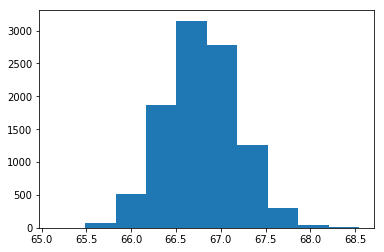

In [33]:
# Plotting only the Non Coffee Drinkers histogram.
plt.hist(mean_non_drinkers);

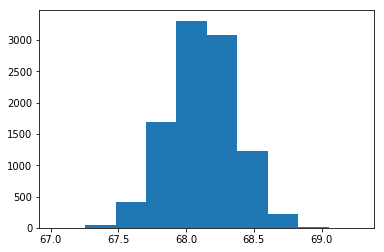

In [34]:
# Plotting only the Coffee Drinkers histogram.
plt.hist(mean_drinkers);

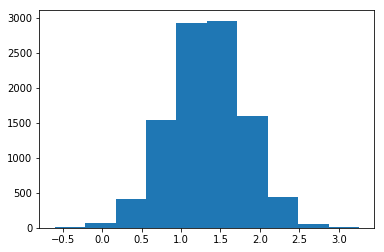

In [56]:
# Plotting only the Mean's Difference.
plt.hist(diff_mean);

Due to the Central Theorem the shape of these two histogram is a bell shape, it means these two histogram is about a Normal Distribution.

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [41]:
null_hyp = np.random.normal(0, mean_std, 10000)

In [48]:
diff = sample_data[sample_data.drinks_coffee].height.mean() - sample_data[np.logical_not(sample_data.drinks_coffee)].height.mean()

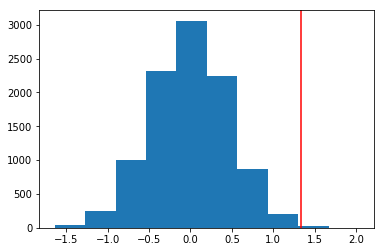

In [55]:
plt.hist(null_hyp);
plt.axvline(x = diff, color = 'r');